<a href="https://colab.research.google.com/github/Felipepa9/MADSI/blob/main/Seccion_2_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 10

IMPORTACIÓN DEL DATASET

In [3]:
data = pd.read_csv('/content/drive/MyDrive/MOD. Y SIST. INTELIGENTES/Seccion_2.csv')
data.head()

,origin_leg_airport_iata_code,destination_leg_airport_iata_code,business_type,taxi_fuel_kg_qty,trip_fuel_kg_qty,extra_fuel_kg_qty,fuel_profitability
0,BOG,MIA,A320,480,6679,463,3
1,BOG,MIA,A320,384,6707,618,3
2,BOG,MIA,A320,288,6922,938,3
3,BOG,MIA,A320,480,7456,1079,3
4,BOG,MIA,A320,480,7604,549,3


PREPARACIÓN DE LOS DATOS

In [4]:
data.describe()

,taxi_fuel_kg_qty,trip_fuel_kg_qty,extra_fuel_kg_qty,fuel_profitability
count,6141.000000,6141.000000,6141.000000,6141.000000
mean,594.869728,24883.396027,1199.942843,2.140205
std,168.563712,13183.490634,1246.855397,0.509883
min,200.000000,6679.000000,0.000000,1.000000
25%,475.000000,15373.000000,0.000000,2.000000
50%,560.000000,16923.000000,1045.000000,2.000000
75%,800.000000,41491.000000,1831.000000,2.000000
max,1200.000000,58901.000000,28994.000000,3.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6141 entries, 0 to 6140
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   origin_leg_airport_iata_code       6141 non-null   object
 1   destination_leg_airport_iata_code  6141 non-null   object
 2   business_type                      6141 non-null   object
 3   taxi_fuel_kg_qty                   6141 non-null   int64 
 4   trip_fuel_kg_qty                   6141 non-null   int64 
 5   extra_fuel_kg_qty                  6141 non-null   int64 
 6   fuel_profitability                 6141 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 336.0+ KB


In [6]:
data.loc[data['origin_leg_airport_iata_code'] == 'BOG', 'origin_leg_airport_iata_code'] = 1
data.loc[data['origin_leg_airport_iata_code'] == 'LIM', 'origin_leg_airport_iata_code'] = 2
data.loc[data['origin_leg_airport_iata_code'] == 'SCL', 'origin_leg_airport_iata_code'] = 3

data['origin_leg_airport_iata_code'] = pd.to_numeric(data['origin_leg_airport_iata_code'], errors='coerce').astype('Int64')

data.head()

,origin_leg_airport_iata_code,destination_leg_airport_iata_code,business_type,taxi_fuel_kg_qty,trip_fuel_kg_qty,extra_fuel_kg_qty,fuel_profitability
0,1,MIA,A320,480,6679,463,3
1,1,MIA,A320,384,6707,618,3
2,1,MIA,A320,288,6922,938,3
3,1,MIA,A320,480,7456,1079,3
4,1,MIA,A320,480,7604,549,3


In [7]:
data = data.drop('destination_leg_airport_iata_code', axis=1)
data.head()

,origin_leg_airport_iata_code,business_type,taxi_fuel_kg_qty,trip_fuel_kg_qty,extra_fuel_kg_qty,fuel_profitability
0,1,A320,480,6679,463,3
1,1,A320,384,6707,618,3
2,1,A320,288,6922,938,3
3,1,A320,480,7456,1079,3
4,1,A320,480,7604,549,3


In [8]:
data['business_type'] = data['business_type'].astype(str).str.replace('A', '', regex=False).str.replace('B', '', regex=False)
data['business_type'] = pd.to_numeric(data['business_type'], errors='coerce').astype('Int64')

data.head()

,origin_leg_airport_iata_code,business_type,taxi_fuel_kg_qty,trip_fuel_kg_qty,extra_fuel_kg_qty,fuel_profitability
0,1,320,480,6679,463,3
1,1,320,384,6707,618,3
2,1,320,288,6922,938,3
3,1,320,480,7456,1079,3
4,1,320,480,7604,549,3


RECONOCIMIENTO DEL DATASET



In [9]:
data.describe()

,origin_leg_airport_iata_code,business_type,taxi_fuel_kg_qty,trip_fuel_kg_qty,extra_fuel_kg_qty,fuel_profitability
count,6141.0,6141.0,6141.000000,6141.000000,6141.000000,6141.000000
mean,1.784237,699.587852,594.869728,24883.396027,1199.942843,2.140205
std,0.863776,160.826931,168.563712,13183.490634,1246.855397,0.509883
min,1.0,320.0,200.000000,6679.000000,0.000000,1.000000
25%,1.0,763.0,475.000000,15373.000000,0.000000,2.000000
50%,1.0,763.0,560.000000,16923.000000,1045.000000,2.000000
75%,3.0,763.0,800.000000,41491.000000,1831.000000,2.000000
max,3.0,789.0,1200.000000,58901.000000,28994.000000,3.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6141 entries, 0 to 6140
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   origin_leg_airport_iata_code  6141 non-null   Int64
 1   business_type                 6141 non-null   Int64
 2   taxi_fuel_kg_qty              6141 non-null   int64
 3   trip_fuel_kg_qty              6141 non-null   int64
 4   extra_fuel_kg_qty             6141 non-null   int64
 5   fuel_profitability            6141 non-null   int64
dtypes: Int64(2), int64(4)
memory usage: 300.0 KB


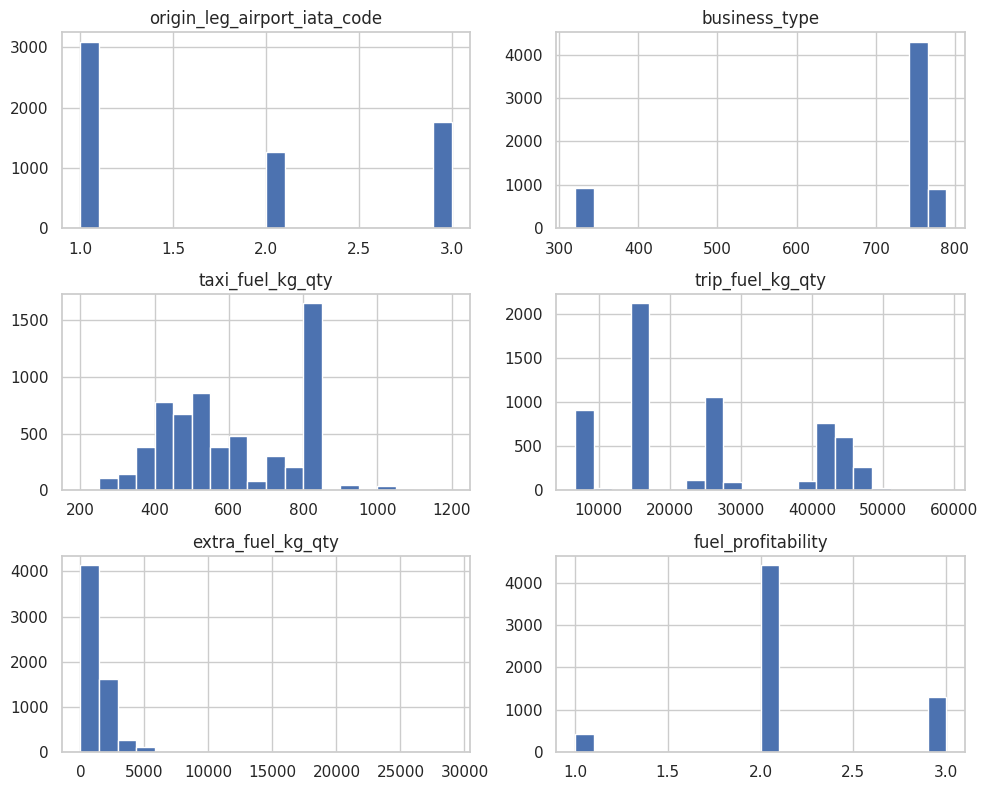

In [11]:
data.hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()

FORMULACIÓN DEL MODELO

In [12]:
feature_names = data.columns[:5].tolist()
feature_names

['origin_leg_airport_iata_code',
 'business_type',
 'taxi_fuel_kg_qty',
 'trip_fuel_kg_qty',
 'extra_fuel_kg_qty']

In [13]:
data['TIPO_RENTAB'] = data['fuel_profitability'].map({
        1: 'baja',
        2: 'media',
        3: 'alta'
    })

data.head()

,origin_leg_airport_iata_code,business_type,taxi_fuel_kg_qty,trip_fuel_kg_qty,extra_fuel_kg_qty,fuel_profitability,TIPO_RENTAB
0,1,320,480,6679,463,3,alta
1,1,320,384,6707,618,3,alta
2,1,320,288,6922,938,3,alta
3,1,320,480,7456,1079,3,alta
4,1,320,480,7604,549,3,alta


In [14]:
    X = data[feature_names]
    y = data['fuel_profitability']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED, stratify=y)

    print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]} muestras.")
    print(f"Tamaño del conjunto de prueba: {X_test.shape[0]} muestras.")
    print(f"\nDimensiones: X_train: {X_train.shape}, y_train: {y_train.shape}, X_test: {X_test.shape}, y_test: {y_test.shape}")

Tamaño del conjunto de entrenamiento: 4912 muestras.
Tamaño del conjunto de prueba: 1229 muestras.

Dimensiones: X_train: (4912, 5), y_train: (4912,), X_test: (1229, 5), y_test: (1229,)


In [15]:
    num_features = X_train.shape[1]

    num_classes = len(y_train.unique())

    y_train_encoded = to_categorical(y_train - 1, num_classes=num_classes)
    y_test_encoded = to_categorical(y_test - 1, num_classes=num_classes)

    l2_lambda=0.005
    dropout_rate=0.3

    model = Sequential([
        Dense(128, activation='relu', input_shape=(num_features,), kernel_regularizer=regularizers.l2(l2_lambda)),

        Dropout(dropout_rate),
        Dense(64, activation='relu', kernel_regularizer=regularizers.l2(l2_lambda)),

        Dropout(dropout_rate),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

    print("\nResumen del modelo:")
    model.summary()


Resumen del modelo:


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,219 (36.01 KB)

 Trainable params: 9,219 (36.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
114/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5262 - loss: 1360.9041

123/123 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.5279 - loss: 1320.3025 - val_accuracy: 0.2238 - val_loss: 77.4039 - learning_rate: 0.0010
Epoch 2/200
114/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5558 - loss: 206.8242

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5566 - loss: 200.6330 - val_accuracy: 0.7263 - val_loss: 3.5917 - learning_rate: 0.0010
Epoch 3/200
116/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6440 - loss: 21.1145

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6456 - loss: 20.6436 - val_accuracy: 0.7253 - val_loss: 3.5217 - learning_rate: 0.0010
Epoch 4/200
113/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7136 - loss: 6.0028

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7132 - loss: 6.0232 - val_accuracy: 0.7253 - val_loss: 3.4468 - learning_rate: 0.0010
Epoch 5/200
116/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7124 - loss: 4.9476

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7123 - loss: 4.9231 - val_accuracy: 0.7253 - val_loss: 3.3964 - learning_rate: 0.0010
Epoch 6/200
115/123 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7147 - loss: 4.8651

123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7146 - loss: 4.8479 - val_accuracy: 0.7253 - val_loss: 3.3573 - learning_rate: 0.0010
Epoch 7/200
118/123 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7162 - loss: 4.2099

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7162 - loss: 4.2009 - val_accuracy: 0.7253 - val_loss: 3.3272 - learning_rate: 0.0010
Epoch 8/200
119/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7166 - loss: 3.8465

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7166 - loss: 3.8527 - val_accuracy: 0.7253 - val_loss: 3.3019 - learning_rate: 0.0010
Epoch 9/200
119/123 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7187 - loss: 3.8104

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7186 - loss: 3.8135 - val_accuracy: 0.7253 - val_loss: 3.2814 - learning_rate: 0.0010
Epoch 10/200
114/123 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7152 - loss: 4.0449

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7153 - loss: 4.0268 - val_accuracy: 0.7253 - val_loss: 3.2648 - learning_rate: 0.0010
Epoch 11/200
122/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7202 - loss: 3.4417

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7202 - loss: 3.4429 - val_accuracy: 0.7253 - val_loss: 3.2437 - learning_rate: 0.0010
Epoch 12/200
122/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7216 - loss: 3.6352

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7216 - loss: 3.6331 - val_accuracy: 0.7253 - val_loss: 3.2234 - learning_rate: 0.0010
Epoch 13/200
107/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7170 - loss: 3.4545

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7171 - loss: 3.4499 - val_accuracy: 0.7253 - val_loss: 3.2018 - learning_rate: 0.0010
Epoch 14/200
114/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7193 - loss: 3.4592

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7193 - loss: 3.4494 - val_accuracy: 0.7253 - val_loss: 3.1843 - learning_rate: 0.0010
Epoch 15/200
121/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7191 - loss: 3.2827

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7191 - loss: 3.2849 - val_accuracy: 0.7253 - val_loss: 3.1642 - learning_rate: 0.0010
Epoch 16/200
113/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7175 - loss: 3.2259

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7176 - loss: 3.2222 - val_accuracy: 0.7253 - val_loss: 3.1424 - learning_rate: 0.0010
Epoch 17/200
112/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7203 - loss: 3.1371

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7202 - loss: 3.1362 - val_accuracy: 0.7253 - val_loss: 3.1173 - learning_rate: 0.0010
Epoch 18/200
113/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7221 - loss: 3.2623

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7219 - loss: 3.2614 - val_accuracy: 0.7253 - val_loss: 3.0964 - learning_rate: 0.0010
Epoch 19/200
108/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7204 - loss: 3.1105

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7203 - loss: 3.1093 - val_accuracy: 0.7253 - val_loss: 3.0732 - learning_rate: 0.0010
Epoch 20/200
117/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7213 - loss: 3.0848

123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7212 - loss: 3.0851 - val_accuracy: 0.7253 - val_loss: 3.0509 - learning_rate: 0.0010
Epoch 21/200
120/123 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7210 - loss: 3.0513

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7209 - loss: 3.0513 - val_accuracy: 0.7253 - val_loss: 3.0274 - learning_rate: 0.0010
Epoch 22/200
114/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7215 - loss: 3.0378

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7214 - loss: 3.0399 - val_accuracy: 0.7253 - val_loss: 3.0022 - learning_rate: 0.0010
Epoch 23/200
118/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7204 - loss: 2.9932

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7203 - loss: 2.9927 - val_accuracy: 0.7253 - val_loss: 2.9750 - learning_rate: 0.0010
Epoch 24/200
111/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7206 - loss: 2.9884

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7205 - loss: 2.9896 - val_accuracy: 0.7253 - val_loss: 2.9551 - learning_rate: 0.0010
Epoch 25/200
117/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7200 - loss: 2.9635

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7199 - loss: 2.9622 - val_accuracy: 0.7253 - val_loss: 2.9276 - learning_rate: 0.0010
Epoch 26/200
115/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7199 - loss: 3.2841

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7198 - loss: 3.2885 - val_accuracy: 0.7253 - val_loss: 2.9044 - learning_rate: 0.0010
Epoch 27/200
110/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7208 - loss: 3.2896

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7208 - loss: 3.2849 - val_accuracy: 0.7253 - val_loss: 2.8783 - learning_rate: 0.0010
Epoch 28/200
121/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7201 - loss: 2.8774

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7200 - loss: 2.8773 - val_accuracy: 0.7253 - val_loss: 2.8494 - learning_rate: 0.0010
Epoch 29/200
119/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7203 - loss: 2.8373

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7202 - loss: 2.8368 - val_accuracy: 0.7253 - val_loss: 2.8190 - learning_rate: 0.0010
Epoch 30/200
114/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7199 - loss: 2.8278

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7199 - loss: 2.8276 - val_accuracy: 0.7253 - val_loss: 2.7905 - learning_rate: 0.0010
Epoch 31/200
115/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 3.0275

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 3.0223 - val_accuracy: 0.7253 - val_loss: 2.7639 - learning_rate: 0.0010
Epoch 32/200
121/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7200 - loss: 2.8808

123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7200 - loss: 2.8818 - val_accuracy: 0.7253 - val_loss: 2.7368 - learning_rate: 0.0010
Epoch 33/200
120/123 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7211 - loss: 2.7361

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7210 - loss: 2.7357 - val_accuracy: 0.7253 - val_loss: 2.7067 - learning_rate: 0.0010
Epoch 34/200
122/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7204 - loss: 2.7763

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7204 - loss: 2.7754 - val_accuracy: 0.7253 - val_loss: 2.6734 - learning_rate: 0.0010
Epoch 35/200
122/123 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7205 - loss: 2.6635

123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7205 - loss: 2.6633 - val_accuracy: 0.7253 - val_loss: 2.6406 - learning_rate: 0.0010
Epoch 36/200
113/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7206 - loss: 2.6684

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7205 - loss: 2.6713 - val_accuracy: 0.7253 - val_loss: 2.6093 - learning_rate: 0.0010
Epoch 37/200
113/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7198 - loss: 2.6297

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7197 - loss: 2.6373 - val_accuracy: 0.7253 - val_loss: 2.5775 - learning_rate: 0.0010
Epoch 38/200
120/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7204 - loss: 2.5673

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7204 - loss: 2.5670 - val_accuracy: 0.7253 - val_loss: 2.5434 - learning_rate: 0.0010
Epoch 39/200
114/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7192 - loss: 2.5495

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7192 - loss: 2.5482 - val_accuracy: 0.7253 - val_loss: 2.5104 - learning_rate: 0.0010
Epoch 40/200
118/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7205 - loss: 2.5031

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7205 - loss: 2.5029 - val_accuracy: 0.7253 - val_loss: 2.4763 - learning_rate: 0.0010
Epoch 41/200
113/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7210 - loss: 2.4799

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7209 - loss: 2.4837 - val_accuracy: 0.7253 - val_loss: 2.4427 - learning_rate: 0.0010
Epoch 42/200
114/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7197 - loss: 2.5953

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7196 - loss: 2.5925 - val_accuracy: 0.7253 - val_loss: 2.4133 - learning_rate: 0.0010
Epoch 43/200
115/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7206 - loss: 2.3984

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7205 - loss: 2.3973 - val_accuracy: 0.7253 - val_loss: 2.3751 - learning_rate: 0.0010
Epoch 44/200
121/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7205 - loss: 2.3688

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7204 - loss: 2.3689 - val_accuracy: 0.7253 - val_loss: 2.3384 - learning_rate: 0.0010
Epoch 45/200
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7191 - loss: 2.3635

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7191 - loss: 2.3636 - val_accuracy: 0.7253 - val_loss: 2.3042 - learning_rate: 0.0010
Epoch 46/200
117/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7203 - loss: 2.3385

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7202 - loss: 2.3391 - val_accuracy: 0.7253 - val_loss: 2.2728 - learning_rate: 0.0010
Epoch 47/200
113/123 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7206 - loss: 2.2579

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7205 - loss: 2.2576 - val_accuracy: 0.7253 - val_loss: 2.2342 - learning_rate: 0.0010
Epoch 48/200
117/123 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7199 - loss: 2.2284

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7198 - loss: 2.2291 - val_accuracy: 0.7253 - val_loss: 2.1996 - learning_rate: 0.0010
Epoch 49/200
119/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 2.1898

123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7207 - loss: 2.1902 - val_accuracy: 0.7253 - val_loss: 2.1622 - learning_rate: 0.0010
Epoch 50/200
122/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7203 - loss: 2.1604

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7203 - loss: 2.1602 - val_accuracy: 0.7253 - val_loss: 2.1251 - learning_rate: 0.0010
Epoch 51/200
111/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7201 - loss: 2.2005

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7200 - loss: 2.1962 - val_accuracy: 0.7253 - val_loss: 2.0912 - learning_rate: 0.0010
Epoch 52/200
122/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7207 - loss: 2.0745

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7206 - loss: 2.0743 - val_accuracy: 0.7253 - val_loss: 2.0508 - learning_rate: 0.0010
Epoch 53/200
116/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7204 - loss: 2.0539

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7204 - loss: 2.0524 - val_accuracy: 0.7253 - val_loss: 2.0125 - learning_rate: 0.0010
Epoch 54/200
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 2.0210

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 2.0208 - val_accuracy: 0.7253 - val_loss: 1.9730 - learning_rate: 0.0010
Epoch 55/200
118/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7204 - loss: 1.9573

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7203 - loss: 1.9565 - val_accuracy: 0.7253 - val_loss: 1.9332 - learning_rate: 0.0010
Epoch 56/200
110/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7204 - loss: 1.9188

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7203 - loss: 1.9170 - val_accuracy: 0.7253 - val_loss: 1.8945 - learning_rate: 0.0010
Epoch 57/200
111/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7195 - loss: 1.9478

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7195 - loss: 1.9443 - val_accuracy: 0.7253 - val_loss: 1.8595 - learning_rate: 0.0010
Epoch 58/200
121/123 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7207 - loss: 1.8711

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7206 - loss: 1.8707 - val_accuracy: 0.7253 - val_loss: 1.8221 - learning_rate: 0.0010
Epoch 59/200
113/123 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7204 - loss: 1.8160

123/123 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7203 - loss: 1.8150 - val_accuracy: 0.7253 - val_loss: 1.7858 - learning_rate: 0.0010
Epoch 60/200
121/123 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7200 - loss: 1.8145

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7200 - loss: 1.8169 - val_accuracy: 0.7253 - val_loss: 1.7514 - learning_rate: 0.0010
Epoch 61/200
116/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7194 - loss: 1.8612

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7194 - loss: 1.8665 - val_accuracy: 0.7253 - val_loss: 1.7216 - learning_rate: 0.0010
Epoch 62/200
118/123 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7205 - loss: 1.7089

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7204 - loss: 1.7085 - val_accuracy: 0.7253 - val_loss: 1.6847 - learning_rate: 0.0010
Epoch 63/200
114/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7205 - loss: 1.6704

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7204 - loss: 1.6691 - val_accuracy: 0.7253 - val_loss: 1.6465 - learning_rate: 0.0010
Epoch 64/200
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7210 - loss: 1.6694

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7210 - loss: 1.6694 - val_accuracy: 0.7253 - val_loss: 1.6149 - learning_rate: 0.0010
Epoch 65/200
118/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7202 - loss: 1.6012

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7201 - loss: 1.6005 - val_accuracy: 0.7253 - val_loss: 1.5777 - learning_rate: 0.0010
Epoch 66/200
121/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7204 - loss: 1.5636

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7204 - loss: 1.5648 - val_accuracy: 0.7253 - val_loss: 1.5416 - learning_rate: 0.0010
Epoch 67/200
119/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7203 - loss: 1.5297

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7203 - loss: 1.5292 - val_accuracy: 0.7253 - val_loss: 1.5101 - learning_rate: 0.0010
Epoch 68/200
116/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7207 - loss: 1.4957

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7206 - loss: 1.4948 - val_accuracy: 0.7253 - val_loss: 1.4739 - learning_rate: 0.0010
Epoch 69/200
121/123 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7207 - loss: 1.5354

123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7206 - loss: 1.5388 - val_accuracy: 0.7253 - val_loss: 1.4407 - learning_rate: 0.0010
Epoch 70/200
114/123 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7190 - loss: 1.4748

123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7190 - loss: 1.4769 - val_accuracy: 0.7253 - val_loss: 1.4151 - learning_rate: 0.0010
Epoch 71/200
111/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 1.4026

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 1.4010 - val_accuracy: 0.7253 - val_loss: 1.3824 - learning_rate: 0.0010
Epoch 72/200
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 1.3862

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 1.3861 - val_accuracy: 0.7253 - val_loss: 1.3545 - learning_rate: 0.0010
Epoch 73/200
110/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 1.3922

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 1.3958 - val_accuracy: 0.7253 - val_loss: 1.3323 - learning_rate: 0.0010
Epoch 74/200
122/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 1.3183

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 1.3181 - val_accuracy: 0.7253 - val_loss: 1.3011 - learning_rate: 0.0010
Epoch 75/200
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7203 - loss: 1.2945

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7203 - loss: 1.2944 - val_accuracy: 0.7253 - val_loss: 1.2713 - learning_rate: 0.0010
Epoch 76/200
111/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7207 - loss: 1.2613

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 1.2602 - val_accuracy: 0.7253 - val_loss: 1.2471 - learning_rate: 0.0010
Epoch 77/200
114/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7204 - loss: 1.2613

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7203 - loss: 1.2590 - val_accuracy: 0.7253 - val_loss: 1.2228 - learning_rate: 0.0010
Epoch 78/200
118/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7199 - loss: 1.2119

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7198 - loss: 1.2113 - val_accuracy: 0.7253 - val_loss: 1.1964 - learning_rate: 0.0010
Epoch 79/200
115/123 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7201 - loss: 1.2408

123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.7200 - loss: 1.2396 - val_accuracy: 0.7253 - val_loss: 1.1744 - learning_rate: 0.0010
Epoch 80/200
119/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7208 - loss: 1.1706

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7207 - loss: 1.1702 - val_accuracy: 0.7253 - val_loss: 1.1511 - learning_rate: 0.0010
Epoch 81/200
119/123 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7215 - loss: 1.1441

123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7214 - loss: 1.1436 - val_accuracy: 0.7253 - val_loss: 1.1304 - learning_rate: 0.0010
Epoch 82/200
112/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7210 - loss: 1.1210

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7208 - loss: 1.1204 - val_accuracy: 0.7253 - val_loss: 1.1094 - learning_rate: 0.0010
Epoch 83/200
114/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 1.0992

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 1.0983 - val_accuracy: 0.7253 - val_loss: 1.0879 - learning_rate: 0.0010
Epoch 84/200
109/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7197 - loss: 1.0788

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7198 - loss: 1.0773 - val_accuracy: 0.7253 - val_loss: 1.0678 - learning_rate: 0.0010
Epoch 85/200
118/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 1.0580

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 1.0575 - val_accuracy: 0.7253 - val_loss: 1.0485 - learning_rate: 0.0010
Epoch 86/200
118/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7206 - loss: 1.0998

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7205 - loss: 1.0991 - val_accuracy: 0.7253 - val_loss: 1.0356 - learning_rate: 0.0010
Epoch 87/200
120/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7197 - loss: 1.0327

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7196 - loss: 1.0323 - val_accuracy: 0.7253 - val_loss: 1.0193 - learning_rate: 0.0010
Epoch 88/200
122/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7208 - loss: 1.0090

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7208 - loss: 1.0089 - val_accuracy: 0.7253 - val_loss: 1.0050 - learning_rate: 0.0010
Epoch 89/200
118/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.9954

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.9951 - val_accuracy: 0.7253 - val_loss: 0.9899 - learning_rate: 0.0010
Epoch 90/200
122/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.9797

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7207 - loss: 0.9795 - val_accuracy: 0.7253 - val_loss: 0.9734 - learning_rate: 0.0010
Epoch 91/200
114/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7207 - loss: 0.9639

123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7206 - loss: 0.9630 - val_accuracy: 0.7253 - val_loss: 0.9575 - learning_rate: 0.0010
Epoch 92/200
117/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7204 - loss: 0.9704

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7204 - loss: 0.9695 - val_accuracy: 0.7253 - val_loss: 0.9463 - learning_rate: 0.0010
Epoch 93/200
121/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7204 - loss: 0.9467

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7204 - loss: 0.9465 - val_accuracy: 0.7253 - val_loss: 0.9406 - learning_rate: 0.0010
Epoch 94/200
118/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.9366

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7206 - loss: 0.9364 - val_accuracy: 0.7253 - val_loss: 0.9307 - learning_rate: 0.0010
Epoch 95/200
109/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.9229

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7206 - loss: 0.9220 - val_accuracy: 0.7253 - val_loss: 0.9202 - learning_rate: 0.0010
Epoch 96/200
120/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.9140

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.9138 - val_accuracy: 0.7253 - val_loss: 0.9118 - learning_rate: 0.0010
Epoch 97/200
118/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.9028

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7206 - loss: 0.9024 - val_accuracy: 0.7253 - val_loss: 0.9007 - learning_rate: 0.0010
Epoch 98/200
119/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7205 - loss: 0.8948

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7204 - loss: 0.8946 - val_accuracy: 0.7253 - val_loss: 0.8949 - learning_rate: 0.0010
Epoch 99/200
115/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.8866

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.8860 - val_accuracy: 0.7253 - val_loss: 0.8845 - learning_rate: 0.0010
Epoch 100/200
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7199 - loss: 0.8818

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7199 - loss: 0.8817 - val_accuracy: 0.7253 - val_loss: 0.8769 - learning_rate: 0.0010
Epoch 101/200
121/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7207 - loss: 0.9019

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7207 - loss: 0.9020 - val_accuracy: 0.7253 - val_loss: 0.8742 - learning_rate: 0.0010
Epoch 102/200
121/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.8658

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.8656 - val_accuracy: 0.7253 - val_loss: 0.8652 - learning_rate: 0.0010
Epoch 103/200
109/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7207 - loss: 0.8583

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7206 - loss: 0.8572 - val_accuracy: 0.7253 - val_loss: 0.8578 - learning_rate: 0.0010
Epoch 104/200
114/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.8503

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.8498 - val_accuracy: 0.7253 - val_loss: 0.8515 - learning_rate: 0.0010
Epoch 105/200
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.9015 - val_accuracy: 0.7253 - val_loss: 0.8544 - learning_rate: 0.0010
Epoch 106/200
118/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7207 - loss: 0.8702

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7206 - loss: 0.8691 - val_accuracy: 0.7253 - val_loss: 0.8500 - learning_rate: 0.0010
Epoch 107/200
120/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7207 - loss: 0.8426

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7206 - loss: 0.8424 - val_accuracy: 0.7253 - val_loss: 0.8443 - learning_rate: 0.0010
Epoch 108/200
115/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7207 - loss: 0.8370

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7206 - loss: 0.8364 - val_accuracy: 0.7253 - val_loss: 0.8396 - learning_rate: 0.0010
Epoch 109/200
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7206 - loss: 0.8470

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7206 - loss: 0.8470 - val_accuracy: 0.7253 - val_loss: 0.8376 - learning_rate: 0.0010
Epoch 110/200
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.8799 - val_accuracy: 0.7253 - val_loss: 0.8424 - learning_rate: 0.0010
Epoch 111/200
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.8349 - val_accuracy: 0.7253 - val_loss: 0.8395 - learning_rate: 0.0010
Epoch 112/200
121/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.8318

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.8317 - val_accuracy: 0.7253 - val_loss: 0.8337 - learning_rate: 0.0010
Epoch 113/200
109/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.8270

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.8260 - val_accuracy: 0.7253 - val_loss: 0.8284 - learning_rate: 0.0010
Epoch 114/200
112/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.8220

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.8213 - val_accuracy: 0.7253 - val_loss: 0.8257 - learning_rate: 0.0010
Epoch 115/200
122/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.8183

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.8182 - val_accuracy: 0.7253 - val_loss: 0.8211 - learning_rate: 0.0010
Epoch 116/200
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.8444 - val_accuracy: 0.7253 - val_loss: 0.8233 - learning_rate: 0.0010
Epoch 117/200
118/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.8160

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.8156 - val_accuracy: 0.7253 - val_loss: 0.8184 - learning_rate: 0.0010
Epoch 118/200
119/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.8111

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.8109 - val_accuracy: 0.7253 - val_loss: 0.8140 - learning_rate: 0.0010
Epoch 119/200
118/123 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7207 - loss: 0.8069

123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7206 - loss: 0.8066 - val_accuracy: 0.7253 - val_loss: 0.8099 - learning_rate: 0.0010
Epoch 120/200
120/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7207 - loss: 0.8028

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7206 - loss: 0.8026 - val_accuracy: 0.7253 - val_loss: 0.8062 - learning_rate: 0.0010
Epoch 121/200
113/123 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7207 - loss: 0.7996

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7206 - loss: 0.7989 - val_accuracy: 0.7253 - val_loss: 0.8027 - learning_rate: 0.0010
Epoch 122/200
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7172 - loss: 0.8116 - val_accuracy: 0.7253 - val_loss: 0.8033 - learning_rate: 0.0010
Epoch 123/200
117/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7966

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.7962 - val_accuracy: 0.7253 - val_loss: 0.7998 - learning_rate: 0.0010
Epoch 124/200
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7207 - loss: 0.7929

123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7206 - loss: 0.7928 - val_accuracy: 0.7253 - val_loss: 0.7978 - learning_rate: 0.0010
Epoch 125/200
116/123 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7207 - loss: 0.7911

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7206 - loss: 0.7906 - val_accuracy: 0.7253 - val_loss: 0.7946 - learning_rate: 0.0010
Epoch 126/200
112/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7887

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.7901 - val_accuracy: 0.7253 - val_loss: 0.7936 - learning_rate: 0.0010
Epoch 127/200
119/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7877

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.7874 - val_accuracy: 0.7253 - val_loss: 0.7920 - learning_rate: 0.0010
Epoch 128/200
121/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.7851

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.7850 - val_accuracy: 0.7253 - val_loss: 0.7891 - learning_rate: 0.0010
Epoch 129/200
121/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7822

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.7821 - val_accuracy: 0.7253 - val_loss: 0.7865 - learning_rate: 0.0010
Epoch 130/200
119/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7799

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7206 - loss: 0.7796 - val_accuracy: 0.7253 - val_loss: 0.7843 - learning_rate: 0.0010
Epoch 131/200
115/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7207 - loss: 0.7779

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7206 - loss: 0.7774 - val_accuracy: 0.7253 - val_loss: 0.7823 - learning_rate: 0.0010
Epoch 132/200
117/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7207 - loss: 0.7764

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7206 - loss: 0.7760 - val_accuracy: 0.7253 - val_loss: 0.7812 - learning_rate: 0.0010
Epoch 133/200
121/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7207 - loss: 0.7745

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7206 - loss: 0.7744 - val_accuracy: 0.7253 - val_loss: 0.7802 - learning_rate: 0.0010
Epoch 134/200
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7192 - loss: 0.8142 - val_accuracy: 0.7253 - val_loss: 0.7849 - learning_rate: 0.0010
Epoch 135/200
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.7775 - val_accuracy: 0.7253 - val_loss: 0.7816 - learning_rate: 0.0010
Epoch 136/200
117/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7749

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.7745 - val_accuracy: 0.7253 - val_loss: 0.7794 - learning_rate: 0.0010
Epoch 137/200
118/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7732

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.7729 - val_accuracy: 0.7253 - val_loss: 0.7785 - learning_rate: 0.0010
Epoch 138/200
116/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7720

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7206 - loss: 0.7716 - val_accuracy: 0.7253 - val_loss: 0.7766 - learning_rate: 0.0010
Epoch 139/200
117/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7207 - loss: 0.7702

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7206 - loss: 0.7698 - val_accuracy: 0.7253 - val_loss: 0.7751 - learning_rate: 0.0010
Epoch 140/200
110/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7692

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.7683 - val_accuracy: 0.7253 - val_loss: 0.7737 - learning_rate: 0.0010
Epoch 141/200
120/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.7677

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.7675 - val_accuracy: 0.7253 - val_loss: 0.7735 - learning_rate: 0.0010
Epoch 142/200
114/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.7674

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.7668 - val_accuracy: 0.7253 - val_loss: 0.7723 - learning_rate: 0.0010
Epoch 143/200
121/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7207 - loss: 0.7657

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7206 - loss: 0.7656 - val_accuracy: 0.7253 - val_loss: 0.7711 - learning_rate: 0.0010
Epoch 144/200
115/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7207 - loss: 0.7650

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7206 - loss: 0.7645 - val_accuracy: 0.7253 - val_loss: 0.7701 - learning_rate: 0.0010
Epoch 145/200
118/123 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7207 - loss: 0.7638

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7206 - loss: 0.7635 - val_accuracy: 0.7253 - val_loss: 0.7691 - learning_rate: 0.0010
Epoch 146/200
122/123 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7207 - loss: 0.7626

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7206 - loss: 0.7625 - val_accuracy: 0.7253 - val_loss: 0.7682 - learning_rate: 0.0010
Epoch 147/200
121/123 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7207 - loss: 0.7618

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7206 - loss: 0.7617 - val_accuracy: 0.7253 - val_loss: 0.7674 - learning_rate: 0.0010
Epoch 148/200
123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7206 - loss: 0.7710 - val_accuracy: 0.7253 - val_loss: 0.7722 - learning_rate: 0.0010
Epoch 149/200
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.7653 - val_accuracy: 0.7253 - val_loss: 0.7709 - learning_rate: 0.0010
Epoch 150/200
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7207 - loss: 0.7645 - val_accuracy: 0.7253 - val_loss: 0.7711 - learning_rate: 0.0010
Epoch 151/200
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.7644 - val_accuracy: 0.7253 - val_loss: 0.7699 - learning_rate: 0.0010
Epoch 152/200
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.7633 - val_accuracy: 0.7253 - val_loss: 0.7690 - learning_rate: 0.0010
Epoch 153/200
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7206 - loss: 0.7613 - val_accuracy: 0.7253 - val_loss: 0.7673 - learning_rate: 5.0000e-04
Epoch 157/200
119/123 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7207 - loss: 0.7611

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7206 - loss: 0.7609 - val_accuracy: 0.7253 - val_loss: 0.7669 - learning_rate: 5.0000e-04
Epoch 158/200
114/123 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7207 - loss: 0.7610

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7206 - loss: 0.7605 - val_accuracy: 0.7253 - val_loss: 0.7665 - learning_rate: 5.0000e-04
Epoch 159/200
113/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7207 - loss: 0.7607

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.7601 - val_accuracy: 0.7253 - val_loss: 0.7661 - learning_rate: 5.0000e-04
Epoch 160/200
113/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7603

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.7597 - val_accuracy: 0.7253 - val_loss: 0.7658 - learning_rate: 5.0000e-04
Epoch 161/200
119/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7207 - loss: 0.7596

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.7593 - val_accuracy: 0.7253 - val_loss: 0.7654 - learning_rate: 5.0000e-04
Epoch 162/200
116/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.7594

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7206 - loss: 0.7590 - val_accuracy: 0.7253 - val_loss: 0.7651 - learning_rate: 5.0000e-04
Epoch 163/200
109/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7595

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7206 - loss: 0.7586 - val_accuracy: 0.7253 - val_loss: 0.7647 - learning_rate: 5.0000e-04
Epoch 164/200
122/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.7584

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7206 - loss: 0.7583 - val_accuracy: 0.7253 - val_loss: 0.7644 - learning_rate: 5.0000e-04
Epoch 165/200
115/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7584

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.7580 - val_accuracy: 0.7253 - val_loss: 0.7641 - learning_rate: 5.0000e-04
Epoch 166/200
109/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7585

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.7577 - val_accuracy: 0.7253 - val_loss: 0.7638 - learning_rate: 5.0000e-04
Epoch 167/200
118/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.7576

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7206 - loss: 0.7574 - val_accuracy: 0.7253 - val_loss: 0.7635 - learning_rate: 5.0000e-04
Epoch 168/200
108/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7580

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.7571 - val_accuracy: 0.7253 - val_loss: 0.7632 - learning_rate: 5.0000e-04
Epoch 169/200
113/123 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7207 - loss: 0.7574

123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7206 - loss: 0.7568 - val_accuracy: 0.7253 - val_loss: 0.7629 - learning_rate: 5.0000e-04
Epoch 170/200
120/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7207 - loss: 0.7567

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7206 - loss: 0.7565 - val_accuracy: 0.7253 - val_loss: 0.7627 - learning_rate: 5.0000e-04
Epoch 171/200
119/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7565

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.7563 - val_accuracy: 0.7253 - val_loss: 0.7624 - learning_rate: 5.0000e-04
Epoch 172/200
118/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7207 - loss: 0.7563

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7206 - loss: 0.7560 - val_accuracy: 0.7253 - val_loss: 0.7622 - learning_rate: 5.0000e-04
Epoch 173/200
108/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.7567

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.7558 - val_accuracy: 0.7253 - val_loss: 0.7619 - learning_rate: 5.0000e-04
Epoch 174/200
122/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.7556

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.7556 - val_accuracy: 0.7253 - val_loss: 0.7617 - learning_rate: 5.0000e-04
Epoch 175/200
122/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.7554

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.7553 - val_accuracy: 0.7253 - val_loss: 0.7615 - learning_rate: 5.0000e-04
Epoch 176/200
115/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7556

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.7551 - val_accuracy: 0.7253 - val_loss: 0.7613 - learning_rate: 5.0000e-04
Epoch 177/200
117/123 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7207 - loss: 0.7553

123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7206 - loss: 0.7550 - val_accuracy: 0.7253 - val_loss: 0.7611 - learning_rate: 5.0000e-04
Epoch 178/200
117/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7207 - loss: 0.7551

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.7548 - val_accuracy: 0.7253 - val_loss: 0.7610 - learning_rate: 5.0000e-04
Epoch 179/200
122/123 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7207 - loss: 0.7547

123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7206 - loss: 0.7546 - val_accuracy: 0.7253 - val_loss: 0.7608 - learning_rate: 5.0000e-04
Epoch 180/200
117/123 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7207 - loss: 0.7548

123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.7206 - loss: 0.7545 - val_accuracy: 0.7253 - val_loss: 0.7607 - learning_rate: 5.0000e-04
Epoch 181/200
118/123 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7207 - loss: 0.7546

123/123 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.7206 - loss: 0.7543 - val_accuracy: 0.7253 - val_loss: 0.7605 - learning_rate: 5.0000e-04
Epoch 182/200
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7207 - loss: 0.7542

123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7206 - loss: 0.7542 - val_accuracy: 0.7253 - val_loss: 0.7604 - learning_rate: 5.0000e-04
Epoch 183/200
121/123 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7207 - loss: 0.7542

123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.7206 - loss: 0.7540 - val_accuracy: 0.7253 - val_loss: 0.7603 - learning_rate: 5.0000e-04
Epoch 184/200
116/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7543

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.7539 - val_accuracy: 0.7253 - val_loss: 0.7601 - learning_rate: 5.0000e-04
Epoch 185/200
122/123 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7207 - loss: 0.7539

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7206 - loss: 0.7538 - val_accuracy: 0.7253 - val_loss: 0.7600 - learning_rate: 5.0000e-04
Epoch 186/200
119/123 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7207 - loss: 0.7539

123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7206 - loss: 0.7537 - val_accuracy: 0.7253 - val_loss: 0.7599 - learning_rate: 5.0000e-04
Epoch 187/200
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7207 - loss: 0.7536

123/123 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.7206 - loss: 0.7536 - val_accuracy: 0.7253 - val_loss: 0.7598 - learning_rate: 5.0000e-04
Epoch 188/200
121/123 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7207 - loss: 0.7536

123/123 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.7206 - loss: 0.7535 - val_accuracy: 0.7253 - val_loss: 0.7597 - learning_rate: 5.0000e-04
Epoch 189/200
120/123 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7207 - loss: 0.7536

123/123 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.7206 - loss: 0.7534 - val_accuracy: 0.7253 - val_loss: 0.7597 - learning_rate: 5.0000e-04
Epoch 190/200
118/123 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7207 - loss: 0.7536

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7206 - loss: 0.7533 - val_accuracy: 0.7253 - val_loss: 0.7596 - learning_rate: 5.0000e-04
Epoch 191/200
116/123 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7207 - loss: 0.7536

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7206 - loss: 0.7532 - val_accuracy: 0.7253 - val_loss: 0.7595 - learning_rate: 5.0000e-04
Epoch 192/200
116/123 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7207 - loss: 0.7536

123/123 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7206 - loss: 0.7532 - val_accuracy: 0.7253 - val_loss: 0.7594 - learning_rate: 5.0000e-04
Epoch 193/200
116/123 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7207 - loss: 0.7535

123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7206 - loss: 0.7531 - val_accuracy: 0.7253 - val_loss: 0.7594 - learning_rate: 5.0000e-04
Epoch 194/200
110/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.7538

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.7530 - val_accuracy: 0.7253 - val_loss: 0.7593 - learning_rate: 5.0000e-04
Epoch 195/200
115/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.7534

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.7530 - val_accuracy: 0.7253 - val_loss: 0.7593 - learning_rate: 5.0000e-04
Epoch 196/200
122/123 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7207 - loss: 0.7530

123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7206 - loss: 0.7529 - val_accuracy: 0.7253 - val_loss: 0.7592 - learning_rate: 5.0000e-04
Epoch 197/200
119/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7207 - loss: 0.7531

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7206 - loss: 0.7529 - val_accuracy: 0.7253 - val_loss: 0.7592 - learning_rate: 5.0000e-04
Epoch 198/200
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7207 - loss: 0.7529

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7206 - loss: 0.7528 - val_accuracy: 0.7253 - val_loss: 0.7591 - learning_rate: 5.0000e-04
Epoch 199/200
118/123 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7207 - loss: 0.7531

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7206 - loss: 0.7528 - val_accuracy: 0.7253 - val_loss: 0.7591 - learning_rate: 5.0000e-04
Epoch 200/200
112/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7207 - loss: 0.7534

123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7206 - loss: 0.7528 - val_accuracy: 0.7253 - val_loss: 0.7590 - learning_rate: 5.0000e-04
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7078 - loss: 0.7698

Precisión en el conjunto de prueba: 72.01%
Pérdida en el conjunto de prueba: 0.7507762908935547
Número de clases: 3


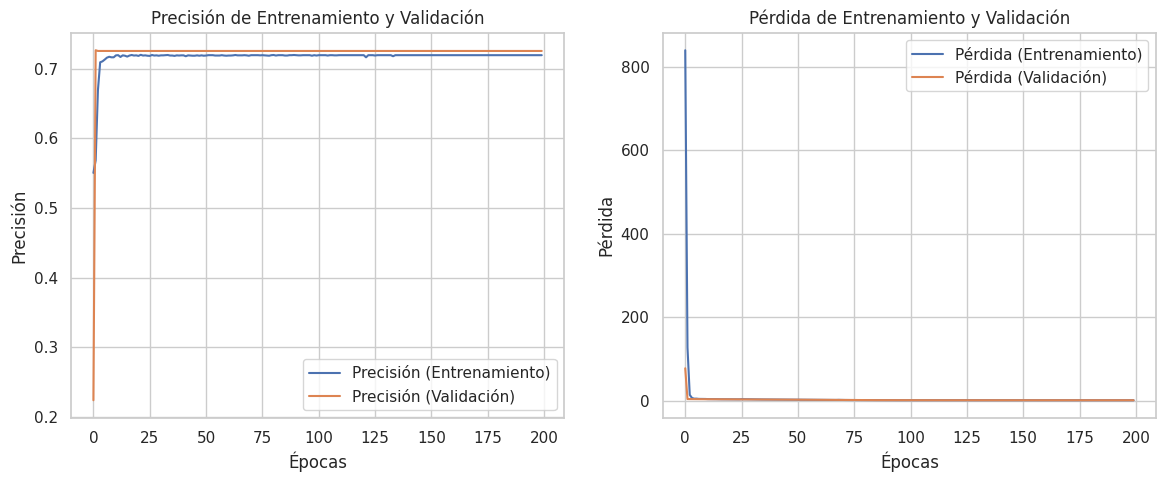

In [16]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)


reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.0001)


history = model.fit(X_train.astype(np.float32), y_train_encoded,
                    epochs=200,
                    batch_size=64,
                    validation_split=0.2,
                    callbacks=[early_stopping, model_checkpoint, reduce_lr])

test_loss, test_accuracy = model.evaluate(X_test.astype(np.float32), y_test_encoded)
print(f"\nPrecisión en el conjunto de prueba: {test_accuracy * 100:.2f}%")
print(f"Pérdida en el conjunto de prueba: {test_loss}")
print(f"Número de clases: {num_classes}")


acc = history.history.get('accuracy')
val_acc = history.history.get('val_accuracy')
loss = history.history.get('loss')
val_loss = history.history.get('val_loss')
epochs_range = range(len(acc if acc else val_acc if val_acc else loss if loss else val_loss))

from tensorflow.keras.optimizers import Adam


optimizer = Adam(learning_rate=0.0002)

model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

plt.figure(figsize=(14, 5))

if acc and val_acc:
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Precisión (Entrenamiento)')
    plt.plot(epochs_range, val_acc, label='Precisión (Validación)')
    plt.legend(loc='lower right')
    plt.title('Precisión de Entrenamiento y Validación')
    plt.xlabel('Épocas')
    plt.ylabel('Precisión')

if loss and val_loss:
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Pérdida (Entrenamiento)')
    plt.plot(epochs_range, val_loss, label='Pérdida (Validación)')
    plt.legend(loc='upper right')
    plt.title('Pérdida de Entrenamiento y Validación')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida')

if not (acc and val_acc and loss and val_loss):
    if acc and val_acc:
         plt.title('Precisión de Entrenamiento y Validación')
         plt.xlabel('Épocas'); plt.ylabel('Precisión')
    elif loss and val_loss:
        plt.title('Pérdida de Entrenamiento y Validación')
        plt.xlabel('Épocas'); plt.ylabel('Pérdida')

plt.show()

Pérdida en el conjunto de prueba: 0.7508
Precisión en el conjunto de prueba: 0.7201
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

Reporte de Clasificación:
              precision    recall  f1-score   support

        baja       0.00      0.00      0.00        86
       media       0.72      1.00      0.84       885
        alta       0.00      0.00      0.00       258

    accuracy                           0.72      1229
   macro avg       0.24      0.33      0.28      1229
weighted avg       0.52      0.72      0.60      1229



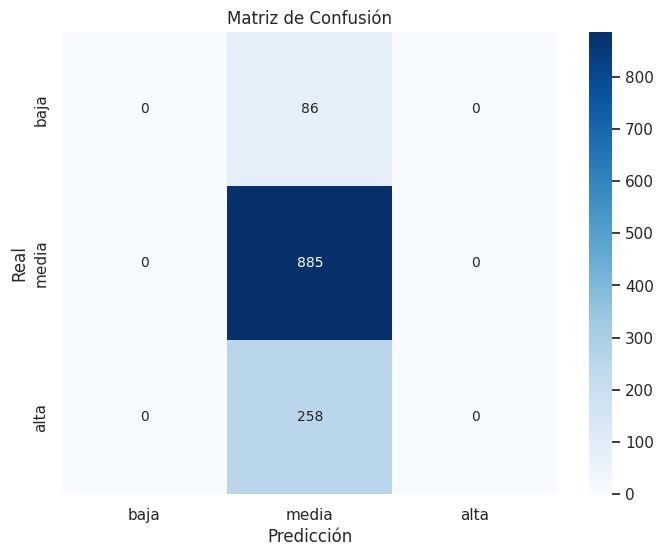

In [17]:
target_names = ['baja', 'media', 'alta']

X_test_np = X_test.astype(np.float32)

loss, accuracy = model.evaluate(X_test_np, y_test_encoded, verbose=0)
print(f"Pérdida en el conjunto de prueba: {loss:.4f}")
print(f"Precisión en el conjunto de prueba: {accuracy:.4f}")


y_pred_proba = model.predict(X_test_np)
y_pred_classes = np.argmax(y_pred_proba, axis=1)
y_true_classes = np.argmax(y_test_encoded, axis=1)


print("\nReporte de Clasificación:")
print(classification_report(y_true_classes, y_pred_classes, target_names=target_names, zero_division=0))


cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()